<a href="https://colab.research.google.com/github/ptrzky/Machine-Learning/blob/main/Praktisi_Latihan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pyplot Tutorial#

##Intro to pyplot<br>



matplotlib.pyplot adalah kumpulan fungsi yang membuat matplotlib berfungsi seperti MATLAB. Setiap fungsi pyplot membuat beberapa perubahan pada gambar: misalnya, membuat gambar, membuat area plot dalam gambar, memplot beberapa garis di area plot, menghiasi plot dengan label, dll.

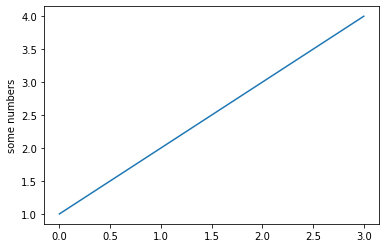

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()


kamu mungkin bertanya-tanya mengapa sumbu x berkisar dari 0-3 dan sumbu y dari 1-4. Jika kamu memberikan satu daftar atau larik untuk diplot, matplotlib menganggapnya sebagai urutan nilai y, dan secara otomatis menghasilkan nilai x untuk anda. Karena rentang python dimulai dengan 0, vektor x default memiliki panjang yang sama dengan y tetapi dimulai dengan 0. Oleh karena itu data x adalah [0, 1, 2, 3].

plot adalah fungsi serbaguna, dan akan mengambil sejumlah argumen yang berubah-ubah. Misalnya, untuk memplot x versus y, Anda dapat menulis:

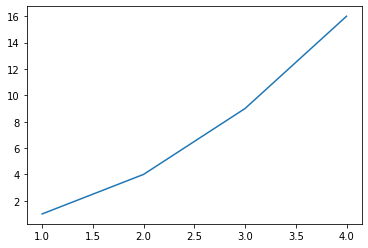

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

###Formatting the style of your plot

Untuk setiap pasangan argumen x, y, ada argumen ketiga opsional yang merupakan format string yang menunjukkan warna dan tipe garis plot. Huruf dan simbol string format berasal dari MATLAB, dan Anda menggabungkan string warna dengan string gaya garis. String format default adalah 'b-', yang merupakan garis biru solid. Misalnya, untuk memplot di atas dengan lingkaran merah, Anda akan mengeluarkan

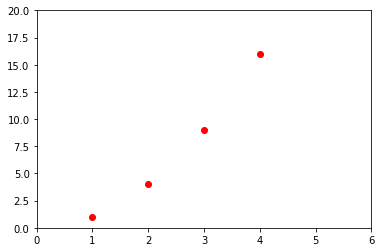

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Lihat dokumentasi plot untuk daftar lengkap gaya garis dan format string. Fungsi sumbu dalam contoh di atas mengambil daftar [xmin, xmax, ymin, ymax] dan menentukan area pandang sumbu.

Jika matplotlib terbatas untuk bekerja dengan daftar, itu akan sangat tidak berguna untuk pemrosesan numerik. Umumnya, Anda akan menggunakan array numpy. Faktanya, semua urutan dikonversi ke array numpy secara internal. Contoh di bawah ini menggambarkan plot beberapa baris dengan gaya format yang berbeda dalam satu panggilan fungsi menggunakan array.

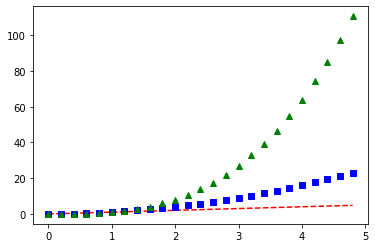

In [4]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

##Plotting with keyword strings

Ada beberapa contoh di mana Anda memiliki data dalam format yang memungkinkan Anda mengakses variabel tertentu dengan string. Misalnya, dengan numpy.recarray atau pandas.DataFrame.

Matplotlib memungkinkan Anda menyediakan objek seperti itu dengan argumen kata kunci data. Jika disediakan, maka Anda dapat membuat plot dengan string yang sesuai dengan variabel ini.

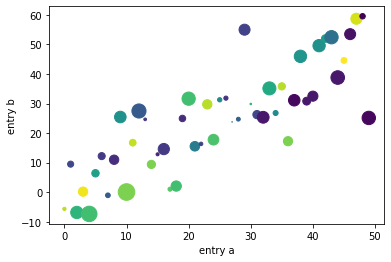

In [5]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

##Plotting with categorical variables

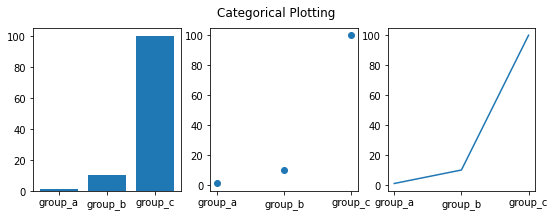

In [6]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

##Controlling line properties

Garis memiliki banyak atribut yang dapat Anda atur: lebar garis, gaya tanda hubung, antialias, dll; lihat matplotlib.lines.Line2D. Ada beberapa cara untuk mengatur properti garis





*   Gunakan argumen kata kunci:




In [ ]:
plt.plot(x, y, linewidth=2.0)



*   Gunakan metode penyetel dari instance Line2D. plot mengembalikan daftar objek Line2D; misalnya, baris1, baris2 = plot(x1, y1, x2, y2). Dalam kode di bawah ini kita akan menganggap bahwa kita hanya memiliki satu baris sehingga daftar yang dikembalikan memiliki panjang 1. Kami menggunakan tuple unpacking with line, untuk mendapatkan elemen pertama dari daftar itu:



In [ ]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing



*   Gunakan pengaturan Contoh di bawah ini menggunakan fungsi gaya MATLAB untuk mengatur beberapa properti pada daftar baris. setp bekerja secara transparan dengan daftar objek atau objek tunggal. Anda dapat menggunakan argumen kata kunci python atau pasangan string/nilai gaya MATLAB:




In [ ]:
lines = plt.plot(x1, y1, x2, y2)
# use keyword arguments
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

##Working with multiple figures and axes

MATLAB, dan pyplot, memiliki konsep gambar saat ini dan sumbu saat ini. Semua fungsi plot berlaku untuk sumbu saat ini. Fungsi gca mengembalikan sumbu saat ini (contoh matplotlib.axes.Axes), dan gcf mengembalikan angka saat ini (contoh matplotlib.figure.Gambar). Biasanya, Anda tidak perlu khawatir tentang hal ini, karena semuanya diurus di belakang layar. Di bawah ini adalah skrip untuk membuat dua subplot.

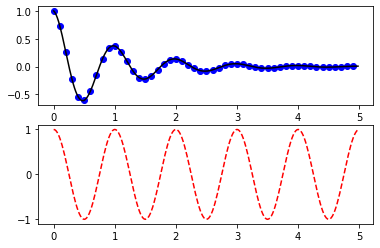

In [9]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

Pemanggilan figure di sini bersifat opsional karena figure akan dibuat jika tidak ada, seperti halnya Axes akan dibuat (setara dengan panggilan subplot() eksplisit) jika tidak ada. Panggilan subplot menentukan numrows, numcols, plot_number di mana plot_number berkisar dari 1 hingga numrows*numcols. Koma dalam panggilan subplot adalah opsional jika numrows*numcols<10. Jadi subplot(211) identik dengan subplot(2, 1, 1).

Anda dapat membuat jumlah subplot dan sumbu yang berubah-ubah. Jika Anda ingin menempatkan Sumbu secara manual, yaitu, bukan pada kotak persegi panjang, gunakan sumbu, yang memungkinkan Anda menentukan lokasi sebagai sumbu ([kiri, bawah, lebar, tinggi]) di mana semua nilai dalam pecahan (0 hingga 1 ) koordinat. Lihat Demo Axes untuk contoh penempatan sumbu secara manual dan Multiple subplot untuk contoh dengan banyak subplot.

Anda dapat membuat beberapa angka dengan menggunakan beberapa panggilan angka dengan jumlah angka yang meningkat. Tentu saja, setiap gambar dapat berisi sumbu dan subplot sebanyak yang Anda inginkan:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


Text(0.5, 1.0, 'Easy as 1, 2, 3')

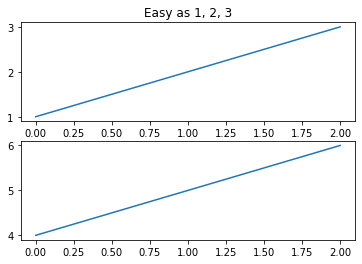

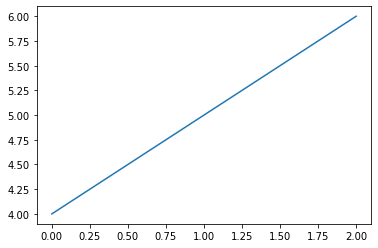

In [10]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

Anda dapat menghapus gambar saat ini dengan clf dan sumbu saat ini dengan cla. Jika Anda merasa menjengkelkan bahwa status (khususnya gambar, gambar, dan sumbu saat ini) dipertahankan untuk Anda di belakang layar, jangan putus asa: ini hanyalah pembungkus stateful tipis di sekitar API berorientasi objek, yang dapat Anda gunakan sebagai gantinya (lihat tutorial Artis)

Jika Anda membuat banyak gambar, Anda perlu menyadari satu hal lagi: memori yang diperlukan untuk gambar tidak sepenuhnya dilepaskan sampai gambar ditutup secara eksplisit dengan close. Menghapus semua referensi ke gambar, dan/atau menggunakan window manager untuk mematikan jendela di mana gambar muncul di layar, tidak cukup, karena pyplot mempertahankan referensi internal sampai close dipanggil.

##Working with text

teks dapat digunakan untuk menambahkan teks di lokasi yang berubah-ubah, dan xlabel, ylabel, dan judul digunakan untuk menambahkan teks di lokasi yang ditunjukkan (lihat Teks di Plot Matplotlib untuk contoh yang lebih detail)

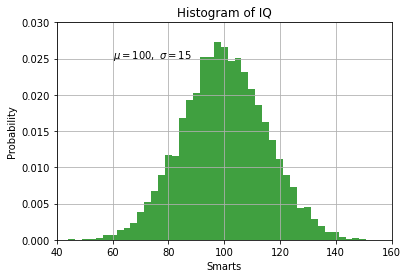

In [11]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Semua fungsi teks mengembalikan instance matplotlib.text.Text. Sama seperti baris di atas, Anda dapat menyesuaikan properti dengan meneruskan argumen kata kunci ke dalam fungsi teks atau menggunakan setp:

In [ ]:
t = plt.xlabel('my data', fontsize=14, color='red')

###Using mathematical expressions in text

matplotlib menerima ekspresi persamaan TeX dalam ekspresi teks apa pun. Misalnya untuk menulis ekspresi
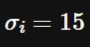dalam judul, Anda dapat menulis ekspresi TeX yang dikelilingi oleh tanda dolar:

In [ ]:
plt.title(r'$\sigma_i=15$')

Huruf r yang mendahului string judul adalah penting -- ini menandakan bahwa string tersebut adalah string mentah dan tidak memperlakukan garis miring terbalik saat python lolos. matplotlib memiliki pengurai ekspresi dan mesin tata letak TeX bawaan, dan mengirimkan font matematikanya sendiri -- untuk detailnya lihat Menulis ekspresi matematika. Dengan demikian Anda dapat menggunakan teks matematika di seluruh platform tanpa memerlukan instalasi TeX. Bagi mereka yang telah menginstal LaTeX dan dvipng, Anda juga dapat menggunakan LaTeX untuk memformat teks Anda dan memasukkan output langsung ke gambar tampilan Anda atau menyimpan postscript -- lihat Render teks dengan LaTeX.

###Annotating text

Penggunaan fungsi teks dasar di atas menempatkan teks pada posisi arbitrer pada Sumbu. Penggunaan umum untuk teks adalah untuk membubuhi keterangan beberapa fitur plot, dan metode anotasi menyediakan fungsionalitas pembantu untuk membuat anotasi menjadi mudah. Dalam anotasi, ada dua hal yang perlu dipertimbangkan: lokasi yang dianotasi diwakili oleh argumen xy dan lokasi teks xy. Kedua argumen ini adalah (x, y) tupel.

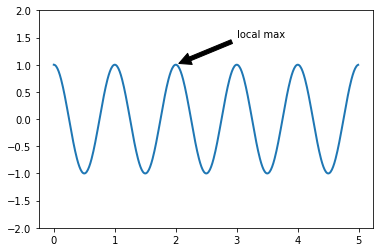

In [12]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

dalam contoh dasar ini, lokasi xy (ujung panah) dan xytext (lokasi teks) berada dalam koordinat data. Ada berbagai sistem koordinat lain yang dapat dipilih -- lihat Anotasi Dasar dan Anotasi Tingkat Lanjut untuk detailnya. Lebih banyak contoh dapat ditemukan di Anotasi Plot.

##Logarithmic and other nonlinear axes

matplotlib.pyplot mendukung tidak hanya skala sumbu linier, tetapi juga skala logaritmik dan logit. Ini biasanya digunakan jika data mencakup banyak orde besarnya. Mengubah skala sumbu itu mudah:

In [ ]:
#plt.xscale('log')

Contoh empat plot dengan data yang sama dan skala yang berbeda untuk sumbu y ditunjukkan di bawah ini.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError


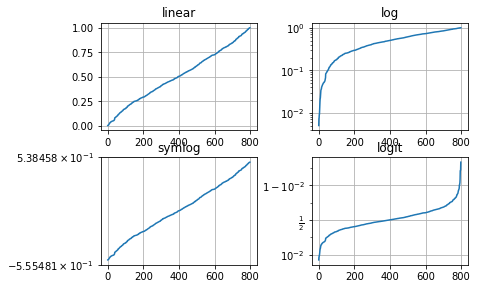

In [13]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()